In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/laptoppriceprediction/Laptop_price.csv


In [2]:
laptops=pd.read_csv("/kaggle/input/laptoppriceprediction/Laptop_price.csv")
laptops.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [3]:
laptops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [4]:
laptops["Brand"].value_counts()

Brand
Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: count, dtype: int64

In [5]:
laptops.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


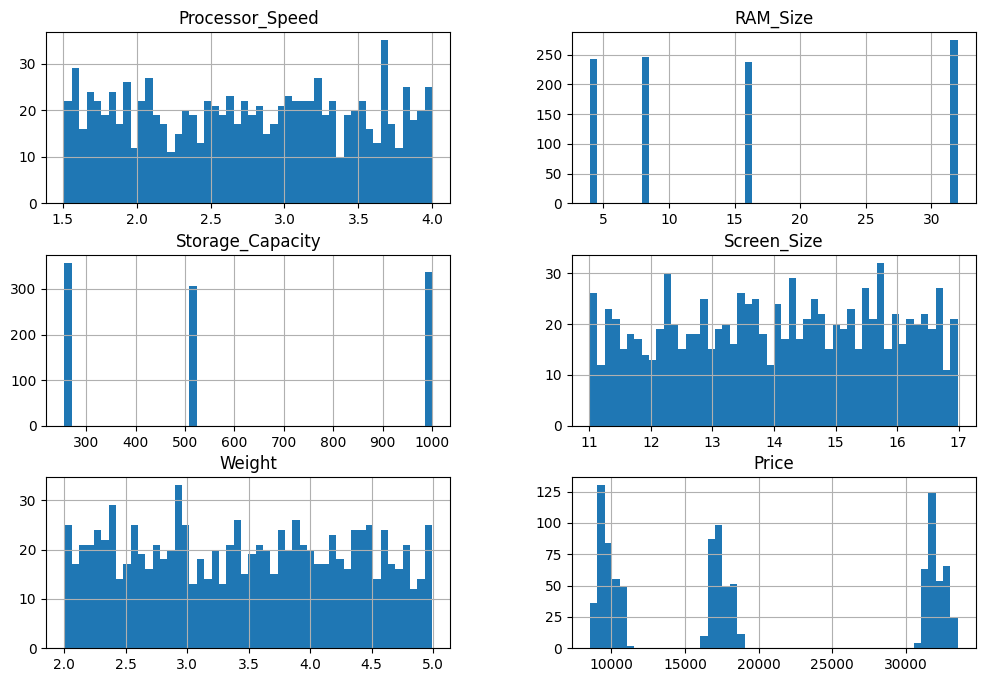

In [6]:
import matplotlib.pyplot as plt
laptops.hist(bins=50,figsize=(12,8))
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(laptops, test_size=0.2, random_state=42)

In [8]:
print(len(train_set),len(test_set))


800 200


In [9]:
train_set_num=train_set.select_dtypes(include=[np.number])

In [10]:
corr_matrix=train_set_num.corr()
corr_matrix

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Processor_Speed,1.000000,0.026077,-0.052729,-0.039526,-0.046223,-0.035791
RAM_Size,0.026077,1.000000,-0.003512,-0.029216,-0.030493,0.055851
Storage_Capacity,-0.052729,-0.003512,1.000000,-0.038800,0.047349,0.997884
Screen_Size,-0.039526,-0.029216,-0.038800,1.000000,0.023276,-0.037513
Weight,-0.046223,-0.030493,0.047349,0.023276,1.000000,0.044200
Price,-0.035791,0.055851,0.997884,-0.037513,0.044200,1.000000


In [11]:
corr_matrix["Price"].sort_values(ascending=False)

Price               1.000000
Storage_Capacity    0.997884
RAM_Size            0.055851
Weight              0.044200
Processor_Speed    -0.035791
Screen_Size        -0.037513
Name: Price, dtype: float64

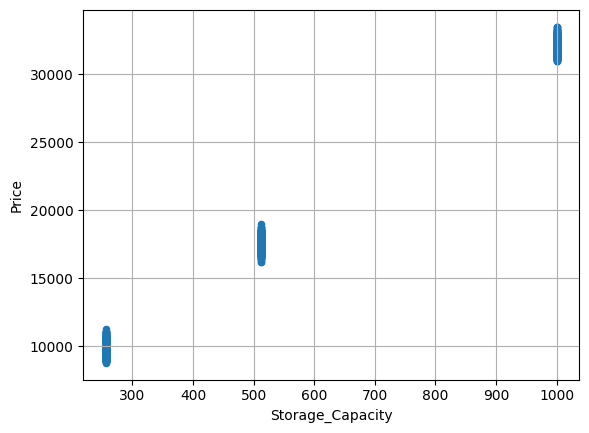

In [12]:
train_set.plot(kind="scatter", x="Storage_Capacity", y= "Price", grid=True)
plt.show()

In [13]:
corr_matrix=train_set_num.corr()
corr_matrix

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
Processor_Speed,1.000000,0.026077,-0.052729,-0.039526,-0.046223,-0.035791
RAM_Size,0.026077,1.000000,-0.003512,-0.029216,-0.030493,0.055851
Storage_Capacity,-0.052729,-0.003512,1.000000,-0.038800,0.047349,0.997884
Screen_Size,-0.039526,-0.029216,-0.038800,1.000000,0.023276,-0.037513
Weight,-0.046223,-0.030493,0.047349,0.023276,1.000000,0.044200
Price,-0.035791,0.055851,0.997884,-0.037513,0.044200,1.000000


In [14]:
corr_matrix["Price"].sort_values(ascending=False)

Price               1.000000
Storage_Capacity    0.997884
RAM_Size            0.055851
Weight              0.044200
Processor_Speed    -0.035791
Screen_Size        -0.037513
Name: Price, dtype: float64

In [15]:
laptops_label=train_set_num["Price"].copy()
laptops_label

29     31747.604606
535    17515.915181
695    17073.491966
557    18399.777107
836    17787.920193
           ...     
106    10711.444213
270    32205.991801
860    31500.579122
435     9059.269729
102    10462.141839
Name: Price, Length: 800, dtype: float64

In [16]:
train_set_num_without_label=train_set_num.drop("Price", axis=1)
train_set_num_without_label

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
29,3.799639,8,1000,12.853007,2.151678
535,3.298004,16,512,15.144079,2.587267
695,2.433129,4,512,15.046398,2.264456
557,3.313144,32,512,12.836309,2.376126
836,3.162279,16,512,14.701664,2.943887
...,...,...,...,...,...
106,1.953589,32,256,14.320274,3.534916
270,2.096943,16,1000,14.492863,4.989697
860,2.884506,4,1000,11.458639,4.942381
435,2.074887,4,256,15.417373,2.991174


In [17]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
imputer.fit(train_set_num_without_label)

SimpleImputer()

In [18]:
imputer.statistics_

array([  2.74584107,  15.33      , 586.49      ,  14.06341824,
         3.47738464])

In [19]:
null_rows_index=train_set_num_without_label.isnull().any(axis=1)
train_set_num_without_label.loc[null_rows_index].head()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight


In [20]:
X_array=imputer.transform(train_set_num_without_label)
imputer.feature_names_in_

array(['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size',
       'Weight'], dtype=object)

In [21]:
X_array

array([[   3.79963904,    8.        , 1000.        ,   12.85300654,
           2.15167756],
       [   3.29800445,   16.        ,  512.        ,   15.14407863,
           2.58726682],
       [   2.43312948,    4.        ,  512.        ,   15.04639791,
           2.26445647],
       ...,
       [   2.8845056 ,    4.        , 1000.        ,   11.45863917,
           4.94238142],
       [   2.07488651,    4.        ,  256.        ,   15.4173733 ,
           2.99117442],
       [   1.53250481,   32.        ,  256.        ,   13.5822485 ,
           3.95627919]])

In [22]:
X=pd.DataFrame(X_array,columns=train_set_num_without_label.columns, index = train_set_num_without_label.index)
X.loc[null_rows_index].head()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight


In [23]:
X

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight
29,3.799639,8.0,1000.0,12.853007,2.151678
535,3.298004,16.0,512.0,15.144079,2.587267
695,2.433129,4.0,512.0,15.046398,2.264456
557,3.313144,32.0,512.0,12.836309,2.376126
836,3.162279,16.0,512.0,14.701664,2.943887
...,...,...,...,...,...
106,1.953589,32.0,256.0,14.320274,3.534916
270,2.096943,16.0,1000.0,14.492863,4.989697
860,2.884506,4.0,1000.0,11.458639,4.942381
435,2.074887,4.0,256.0,15.417373,2.991174


In [24]:
from sklearn.ensemble import IsolationForest
isolation_forest=IsolationForest(random_state=42)
outlier_predict=isolation_forest.fit_predict(X)
outlier_predict[:9]

array([-1, -1, -1, -1,  1, -1,  1, -1, -1])

In [25]:
laptops_cat=train_set[["Brand"]]
laptops_cat.head(9)

,Brand
29,Asus
535,Acer
695,HP
557,Acer
836,HP
596,Acer
165,HP
918,Acer
495,Dell


In [26]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder(sparse_output=False)
laptops_cat_encoded=cat_encoder.fit_transform(laptops_cat)
laptops_cat_encoded

array([[0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [27]:
cat_encoder.categories_

[array(['Acer', 'Asus', 'Dell', 'HP', 'Lenovo'], dtype=object)]

In [28]:
cat_encoder.feature_names_in_

array(['Brand'], dtype=object)

In [29]:
cat_encoder.get_feature_names_out()

array(['Brand_Acer', 'Brand_Asus', 'Brand_Dell', 'Brand_HP',
       'Brand_Lenovo'], dtype=object)

In [30]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler=MinMaxScaler(feature_range=(-1,1))
laptops_minmax=min_max_scaler.fit_transform(X)
laptops_minmax

array([[ 0.84274128, -0.71428571,  1.        , -0.38365894, -0.89892342],
       [ 0.43860226, -0.14285714, -0.31182796,  0.38340353, -0.60757575],
       [-0.25817928, -1.        , -0.31182796,  0.35069953, -0.82349026],
       ...,
       [ 0.10546929, -1.        ,  1.        , -0.85050016,  0.9676632 ],
       [-0.54679566, -1.        , -1.        ,  0.47490396, -0.33741862],
       [-0.98376236,  1.        , -1.        , -0.13950506,  0.30810012]])

In [31]:
from sklearn.linear_model import LinearRegression

"""target_scaler=StandardScaler()
scaled_labels = target_scaler.fit_transform(laptops_label.toframe())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data=housing[["median_income"]].iloc[:5]

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaler_prediction)"""

'target_scaler=StandardScaler()\nscaled_labels = target_scaler.fit_transform(laptops_label.toframe())\n\nmodel = LinearRegression()\nmodel.fit(housing[["median_income"]], scaled_labels)\nsome_new_data=housing[["median_income"]].iloc[:5]\n\nscaled_predictions = model.predict(some_new_data)\npredictions = target_scaler.inverse_transform(scaler_prediction)'